# Imports

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

# Data Exploration

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#Checking for missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
#Distribution of legit & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly imbalanced

0 -> Legit Transactions
1 -> Fraudulent Transactions

In [13]:
#Seperating data
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


In [16]:
#Statistical Measures of data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
#Comparing the values for both type of transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Sampling Data

Since dataset is very unbalanced, we will use a method called Undersampling by sampling a similar distribution of 
legitimate transactions and fraudulent transactions to avoid bias in our models.

In [36]:
legit_sample = legit.sample(n=492, random_state=200)
legit_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
182549,125449.0,1.937769,-0.358484,-1.132389,0.505389,-0.009441,-0.347319,-0.091128,-0.181909,0.689592,...,0.360953,1.156120,-0.058318,0.710775,0.173003,0.588750,-0.049402,-0.044830,62.28,0
242855,151686.0,-0.051835,1.063799,-0.384766,-0.627606,1.068703,-0.695809,1.231787,-0.327827,0.221380,...,-0.416489,-0.774733,0.106159,0.508240,-0.380572,0.095392,0.178625,-0.077808,21.99,0
166455,118091.0,-1.623759,0.268934,0.842905,0.746541,-0.308543,2.444393,0.882052,1.122514,-0.495658,...,-0.131594,-0.820485,0.597760,-1.784849,0.281767,-0.636705,0.156832,0.074377,311.17,0
221740,142684.0,2.172707,-0.152504,-1.694980,-0.879244,0.478024,-0.651436,0.188336,-0.331358,0.639439,...,-0.330778,-0.822218,0.289383,0.089066,-0.231613,0.546807,-0.099328,-0.064679,2.00,0
94428,64882.0,1.014436,-1.122082,0.951158,-0.578190,-1.613134,-0.446558,-0.838694,-0.036009,-0.858648,...,0.554672,1.216614,-0.241677,0.617381,0.349586,-0.099704,0.011673,0.047453,169.00,0


## Concat sampled and fraud dataset

In [27]:
new_df = pd.concat([legit_sample, fraud], axis=0)

In [28]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
182549,125449.0,1.937769,-0.358484,-1.132389,0.505389,-0.009441,-0.347319,-0.091128,-0.181909,0.689592,...,0.360953,1.156120,-0.058318,0.710775,0.173003,0.588750,-0.049402,-0.044830,62.28,0
242855,151686.0,-0.051835,1.063799,-0.384766,-0.627606,1.068703,-0.695809,1.231787,-0.327827,0.221380,...,-0.416489,-0.774733,0.106159,0.508240,-0.380572,0.095392,0.178625,-0.077808,21.99,0
166455,118091.0,-1.623759,0.268934,0.842905,0.746541,-0.308543,2.444393,0.882052,1.122514,-0.495658,...,-0.131594,-0.820485,0.597760,-1.784849,0.281767,-0.636705,0.156832,0.074377,311.17,0
221740,142684.0,2.172707,-0.152504,-1.694980,-0.879244,0.478024,-0.651436,0.188336,-0.331358,0.639439,...,-0.330778,-0.822218,0.289383,0.089066,-0.231613,0.546807,-0.099328,-0.064679,2.00,0
94428,64882.0,1.014436,-1.122082,0.951158,-0.578190,-1.613134,-0.446558,-0.838694,-0.036009,-0.858648,...,0.554672,1.216614,-0.241677,0.617381,0.349586,-0.099704,0.011673,0.047453,169.00,0


In [37]:
#Checking distributions of legit & fraud transactions
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Below, we will check the mean for our sampled dataset vs original dataset, to check if we have a good sample

In [38]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98113.439024,0.210684,-0.034425,0.000301,0.052848,0.072835,0.014582,0.003925,-0.042012,-0.023464,...,0.014843,-0.019787,-0.019020,-0.022561,0.012987,-0.014969,-0.009112,-0.005001,-0.002116,86.556707
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Evaluating Models

## Scaling data

In [42]:
X = new_df.drop('Class',axis=1).values
y = new_df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Cross-validation

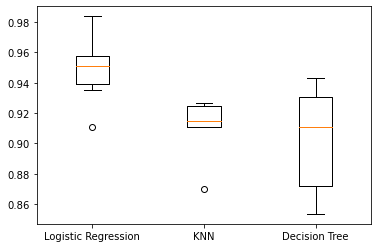

In [47]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42,shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels = models.keys())
plt.show()

Logistic Regression has the best median score

In [58]:
#Test set performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled,y_test)
    train_score = model.score(X_train_scaled,y_train)
    print('{}Test Set Accuracy: {}'.format(name,test_score))

Logistic RegressionTest Set Accuracy: 0.926829268292683
KNNTest Set Accuracy: 0.9227642276422764
Decision TreeTest Set Accuracy: 0.8780487804878049
